<a href="https://colab.research.google.com/github/mkhalil7625/DS-Unit-2-Kaggle-Challenge/blob/master/module1-decision-trees/Copy2_of_LS_DS_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys
# %%capture
# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [3]:
# Reduce cardinality for lga feature ...
 
# Get a list of the top 20 lga
top20 = train['funder'].value_counts()[:20].index
 
# At locations where the lga is NOT in the top 20,
# replace the lga with 'OTHER'
train.loc[~train['funder'].isin(top20), 'funder'] = 'OTHER'
test.loc[~test['funder'].isin(top20), 'funder'] = 'OTHER'

In [4]:
# Reduce cardinality for lga feature ...
 
# Get a list of the top 10 lga
top20 = train['installer'].value_counts()[:20].index
 
# At locations where the lga is NOT in the top 20,
# replace the lga with 'OTHER'
train.loc[~train['installer'].isin(top20), 'installer'] = 'OTHER'
test.loc[~test['installer'].isin(top20), 'installer'] = 'OTHER'


In [5]:
# Reduce cardinality for lga feature ...
 
# Get a list of the top 20 lga
top20 = train['lga'].value_counts()[:20].index
 
# At locations where the lga is NOT in the top 20,
# replace the lga with 'OTHER'
train.loc[~train['lga'].isin(top20), 'lga'] = 'OTHER'
test.loc[~test['lga'].isin(top20), 'lga'] = 'OTHER'

In [6]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
# Do train/validate/test split with the Tanzania Waterpumps data.
# split train into train abnd val
train,val = train_test_split(train, test_size=.20, stratify=train['status_group'],random_state=42)
train.shape,val.shape,test.shape

((47520, 41), (11880, 41), (14358, 40))

In [8]:
# Begin with baselines for classification. majority lcass freq = 54%
train['status_group'].value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [9]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
43360,72938,0.0,2011-07-27,OTHER,0,OTHER,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
7263,65358,500.0,2011-03-23,OTHER,2049,OTHER,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175,True,GeoData Consultants Ltd,WUA,Tove Mtwango gravity Scheme,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2486,469,25.0,2011-03-07,OTHER,290,OTHER,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300,True,GeoData Consultants Ltd,VWC,NaN,False,2010,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
313,1298,0.0,2011-07-31,Government Of Tanzania,0,DWE,30.716727,-1.289055,Kwajovin 2,0,Lake Victoria,Kihanga,Kagera,18,1,Karagwe,Isingiro,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
52726,27001,0.0,2011-03-10,Water,0,OTHER,35.389331,-6.399942,Chama,0,Internal,Mtakuj,Dodoma,1,6,OTHER,Nondwa,0,True,GeoData Consultants Ltd,VWC,Zeje,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional


In [10]:
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,47520.000000,47520.000000,47520.000000,47520.000000,4.752000e+04,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000
mean,37037.915699,321.925261,669.567656,34.082431,-5.705946e+00,0.477736,15.258291,5.616751,179.805513,1302.768939
std,21412.099719,3197.240487,693.005745,6.552053,2.941332e+00,13.312977,17.530228,9.621230,463.081564,950.955437
min,0.000000,0.000000,-63.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18482.750000,0.000000,0.000000,33.092142,-8.528215e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,36986.500000,0.000000,372.500000,34.910740,-5.021436e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55450.250000,25.000000,1320.000000,37.170578,-3.327185e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.344301,-2.000000e-08,1776.000000,99.000000,80.000000,15300.000000,2013.000000


In [11]:
train.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,47520,47520,47520,47520,47520,47234,47520,47520,47520,44876,47520,44392,24988,45077,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520
unique,349,21,21,30661,9,17231,21,21,2082,2,1,12,2563,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,3
top,2011-03-17,OTHER,OTHER,none,Lake Victoria,Shuleni,Iringa,OTHER,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,474,24048,22550,2879,8137,420,4250,30611,257,40838,47520,29470,548,31071,21448,21448,21448,32449,42027,20287,20287,40598,40598,26567,26567,13620,13620,36638,22778,27642,25807


In [12]:
train['payment_type'].value_counts()

never pay     20287
per bucket     7161
monthly        6644
unknown        6532
on failure     3093
annually       2938
other           865
Name: payment_type, dtype: int64

In [13]:
train['payment'].value_counts()

never pay                20287
pay per bucket            7161
pay monthly               6644
unknown                   6532
pay when scheme fails     3093
pay annually              2938
other                      865
Name: payment, dtype: int64

In [14]:
train['lga'].value_counts()[:20]

OTHER            30611
Njombe            2003
Moshi Rural       1005
Arusha Rural       997
Bariadi            931
Kilosa             895
Rungwe             885
Mbozi              827
Kasulu             818
Meru               815
Bagamoyo           797
Singida Rural      789
Kilombero          775
Kibondo            724
Same               693
Kyela              690
Kigoma Rural       679
Kahama             670
Magu               654
Maswa              651
Name: lga, dtype: int64

In [15]:
train['installer'].value_counts()[:50]

OTHER                 22550
DWE                   13978
Government             1458
RWE                     960
Commu                   846
DANIDA                  842
KKKT                    709
Hesawa                  668
0                       607
TCRS                    576
Central government      489
CES                     481
Community               446
District Council        444
DANID                   439
HESAWA                  428
World vision            336
LGA                     333
WEDECO                  314
TASAF                   311
District council        305
Name: installer, dtype: int64

In [16]:
# # Reduce cardinality for lga feature ...
 
# # Get a list of the top 10 neighborhoods
# top10 = train['funder'].value_counts()[:10].index
 
# # At locations where the lga is NOT in the top 10,
# # replace the lga with 'OTHER'
# train.loc[~train['lga'].isin(top10), 'lga'] = 'OTHER'
# test.loc[~test['lga'].isin(top10), 'lga'] = 'OTHER'

In [17]:
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 
                       'gps_height', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)

    # Drop duplicate columns
    duplicates = ['quantity_group', 'payment_type','waterpoint_type_group','extraction_type_group','extraction_type_class']
    X = X.drop(columns=duplicates)
    
    # Drop recorded_by (never varies) and id (always varies, random)
    unusable_variance = ['recorded_by', 'id']
    X = X.drop(columns=unusable_variance)
    
    # return the wrangled dataframe
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [18]:
target = 'status_group'
train_features = train.drop(columns=[target])
num_features = train_features.select_dtypes(include='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
cat_features = cardinality[cardinality <= 50].index.tolist()
features = num_features+cat_features

In [19]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [20]:
X_train.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,funder,installer,basin,region,lga,public_meeting,scheme_management,permit,extraction_type,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type
43360,0.0,NaN,33.542898,-9.174777,0,12,4,NaN,NaN,OTHER,OTHER,Lake Nyasa,Mbeya,Rungwe,True,VWC,NaN,gravity,vwc,user-group,never pay,soft,good,insufficient,spring,spring,groundwater,communal standpipe
7263,500.0,2049.0,34.665760,-9.308548,0,11,4,175.0,2008.0,OTHER,OTHER,Rufiji,Iringa,Njombe,True,WUA,True,gravity,wua,user-group,pay monthly,soft,good,enough,spring,spring,groundwater,communal standpipe
2486,25.0,290.0,38.238568,-6.179919,0,6,1,2300.0,2010.0,OTHER,OTHER,Wami / Ruvu,Pwani,Bagamoyo,True,VWC,False,india mark ii,vwc,user-group,pay per bucket,salty,salty,insufficient,shallow well,shallow well,groundwater,hand pump
313,0.0,NaN,30.716727,-1.289055,0,18,1,NaN,NaN,Government Of Tanzania,DWE,Lake Victoria,Kagera,Karagwe,True,NaN,True,other,vwc,user-group,never pay,soft,good,enough,shallow well,shallow well,groundwater,other
52726,0.0,NaN,35.389331,-6.399942,0,1,6,NaN,NaN,Water,OTHER,Internal,Dodoma,OTHER,True,VWC,True,mono,vwc,user-group,pay per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe


In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(min_samples_leaf=10,max_depth=60,random_state=42)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on validation
print ('Train Accuracy', pipeline.score(X_train, y_train))
print ('Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)



Train Accuracy 0.839520202020202
Validation Accuracy 0.7773569023569024


In [22]:
y_pred

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

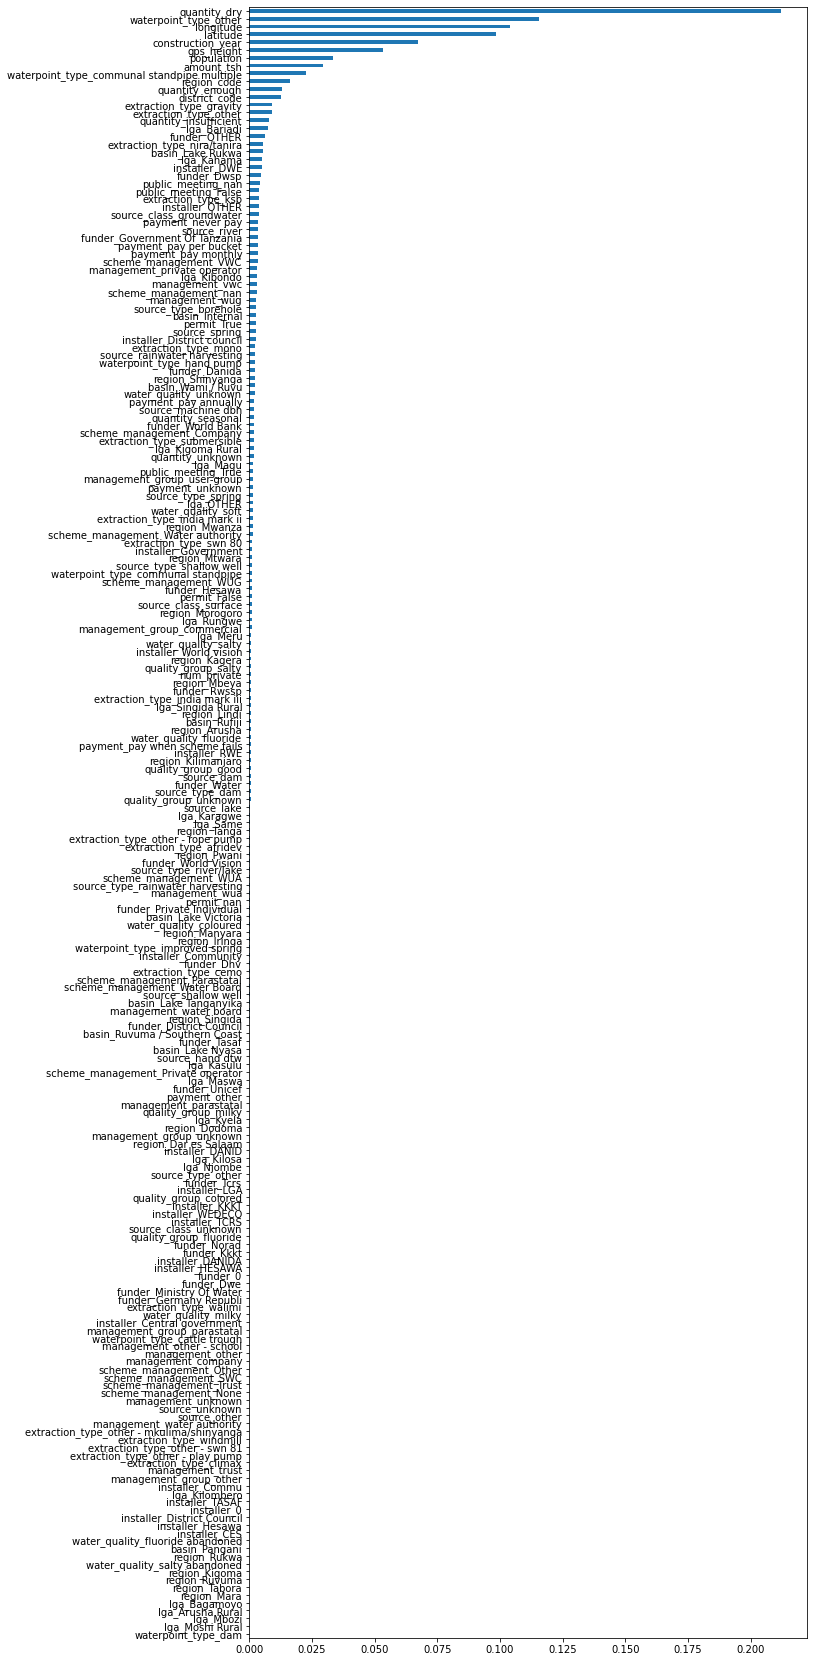

In [23]:
# feature importances
import matplotlib.pyplot as plt

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh()

In [24]:
importances.sort_values(ascending=False).head(70)



quantity_dry                         0.212003
waterpoint_type_other                0.115541
longitude                            0.104036
latitude                             0.098412
construction_year                    0.067420
                                       ...   
extraction_type_india mark ii        0.001420
region_Mwanza                        0.001351
scheme_management_Water authority    0.001323
extraction_type_swn 80               0.001314
installer_Government                 0.001293
Length: 70, dtype: float64

In [25]:
submission = sample_submission.copy()
submission['status_group'] = y_pred #<--This is for your test data-->
submission.to_csv("Your_Submission.csv", index = False)